# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 99101087
full_name = 'AmirReza Azari'
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [3]:
df = pd.read_csv('nutrition.csv')
print(len(df))
df.head()

8618


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [5]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_numeric = df[numeric_columns]
df_numeric.set_index('ID', inplace=True)
df_numeric.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

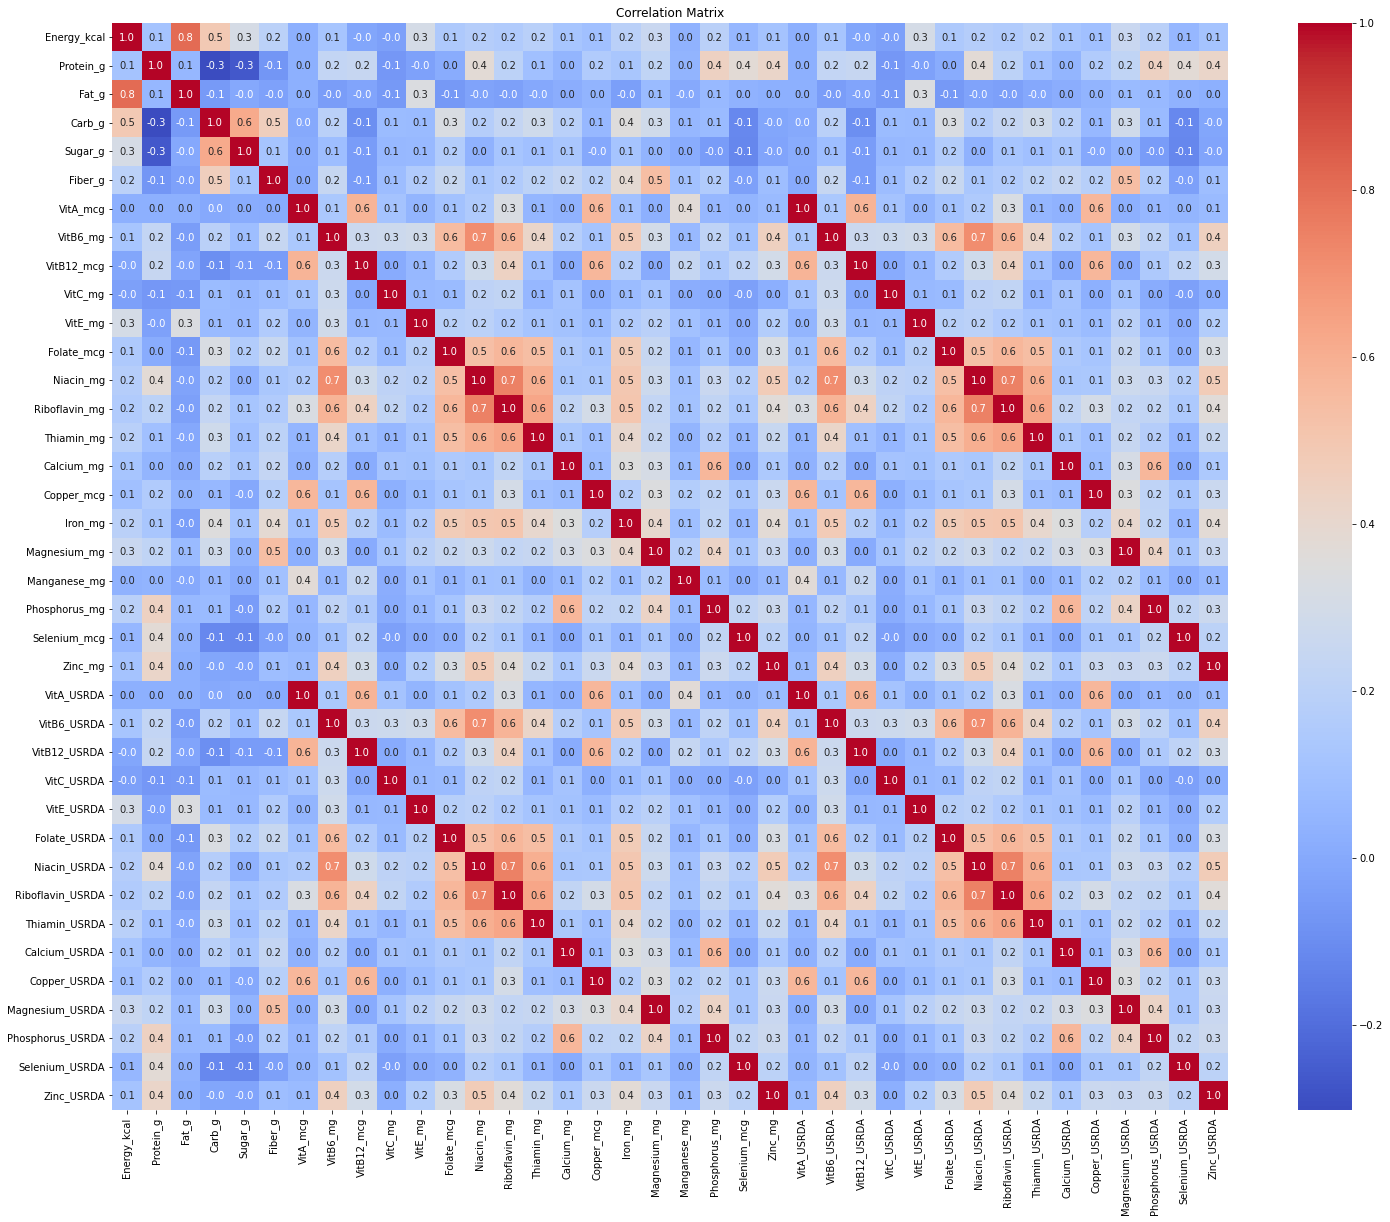

In [6]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

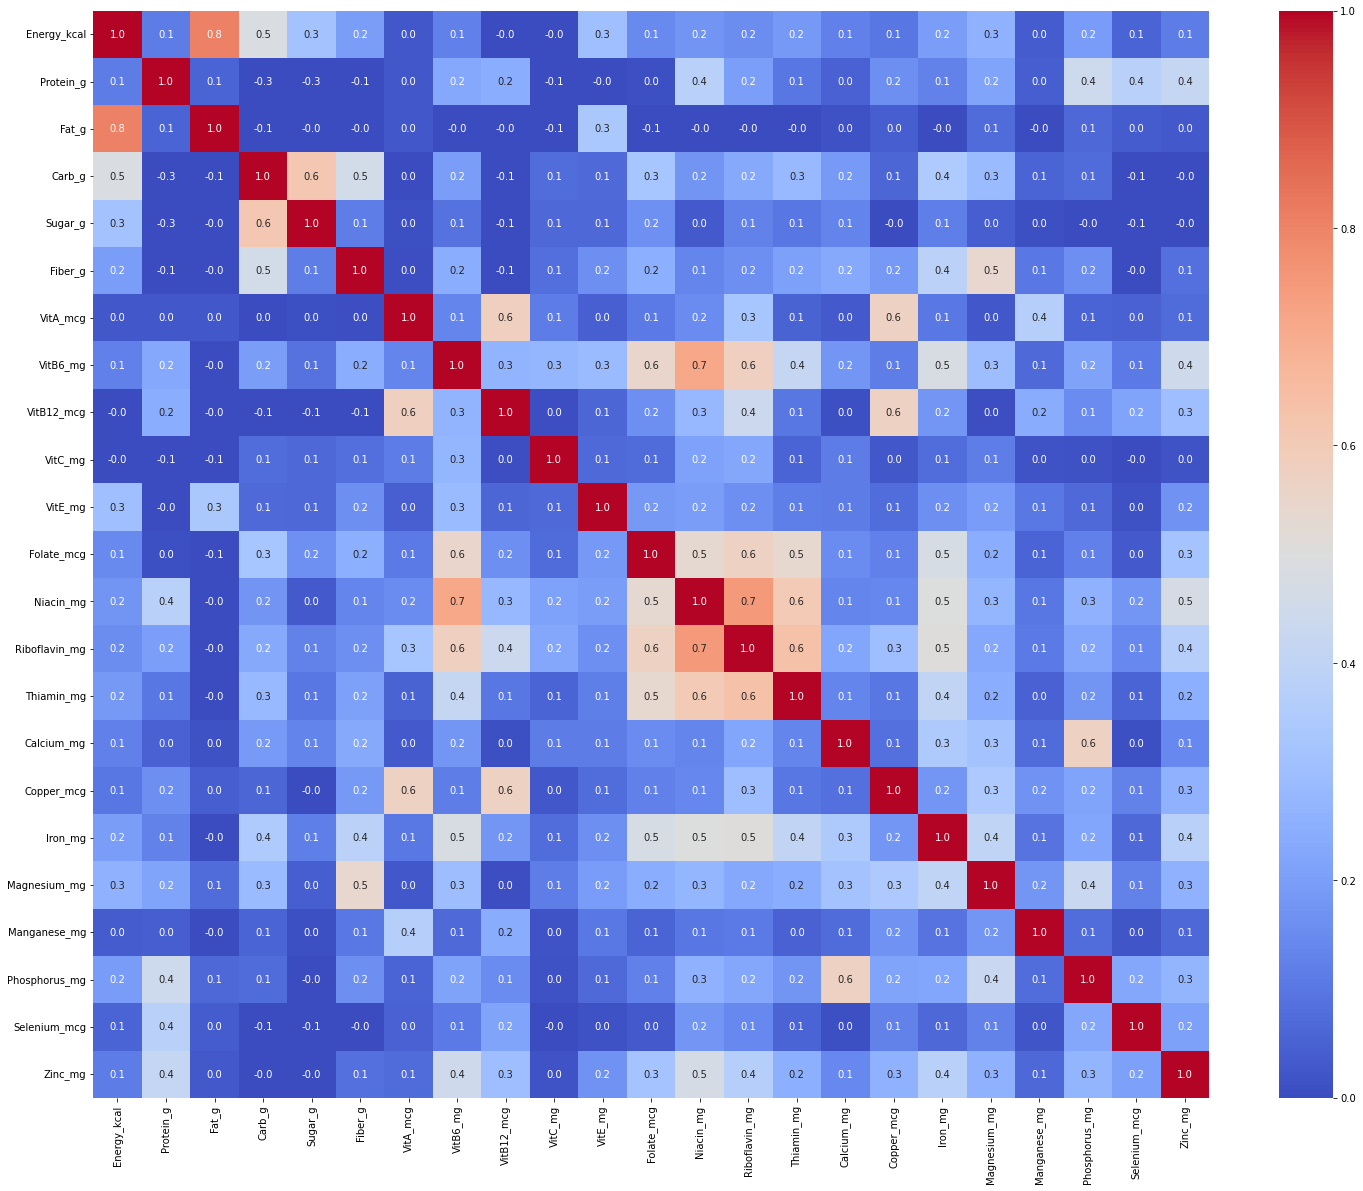

In [7]:
threshold = 0.9
redundant_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            redundant_features.add(colname_j)

df_redundant = df_numeric.drop(columns=redundant_features)
df_help = df_redundant
plt.figure(figsize=(25, 20))
sns.heatmap(df_help.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.1f')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

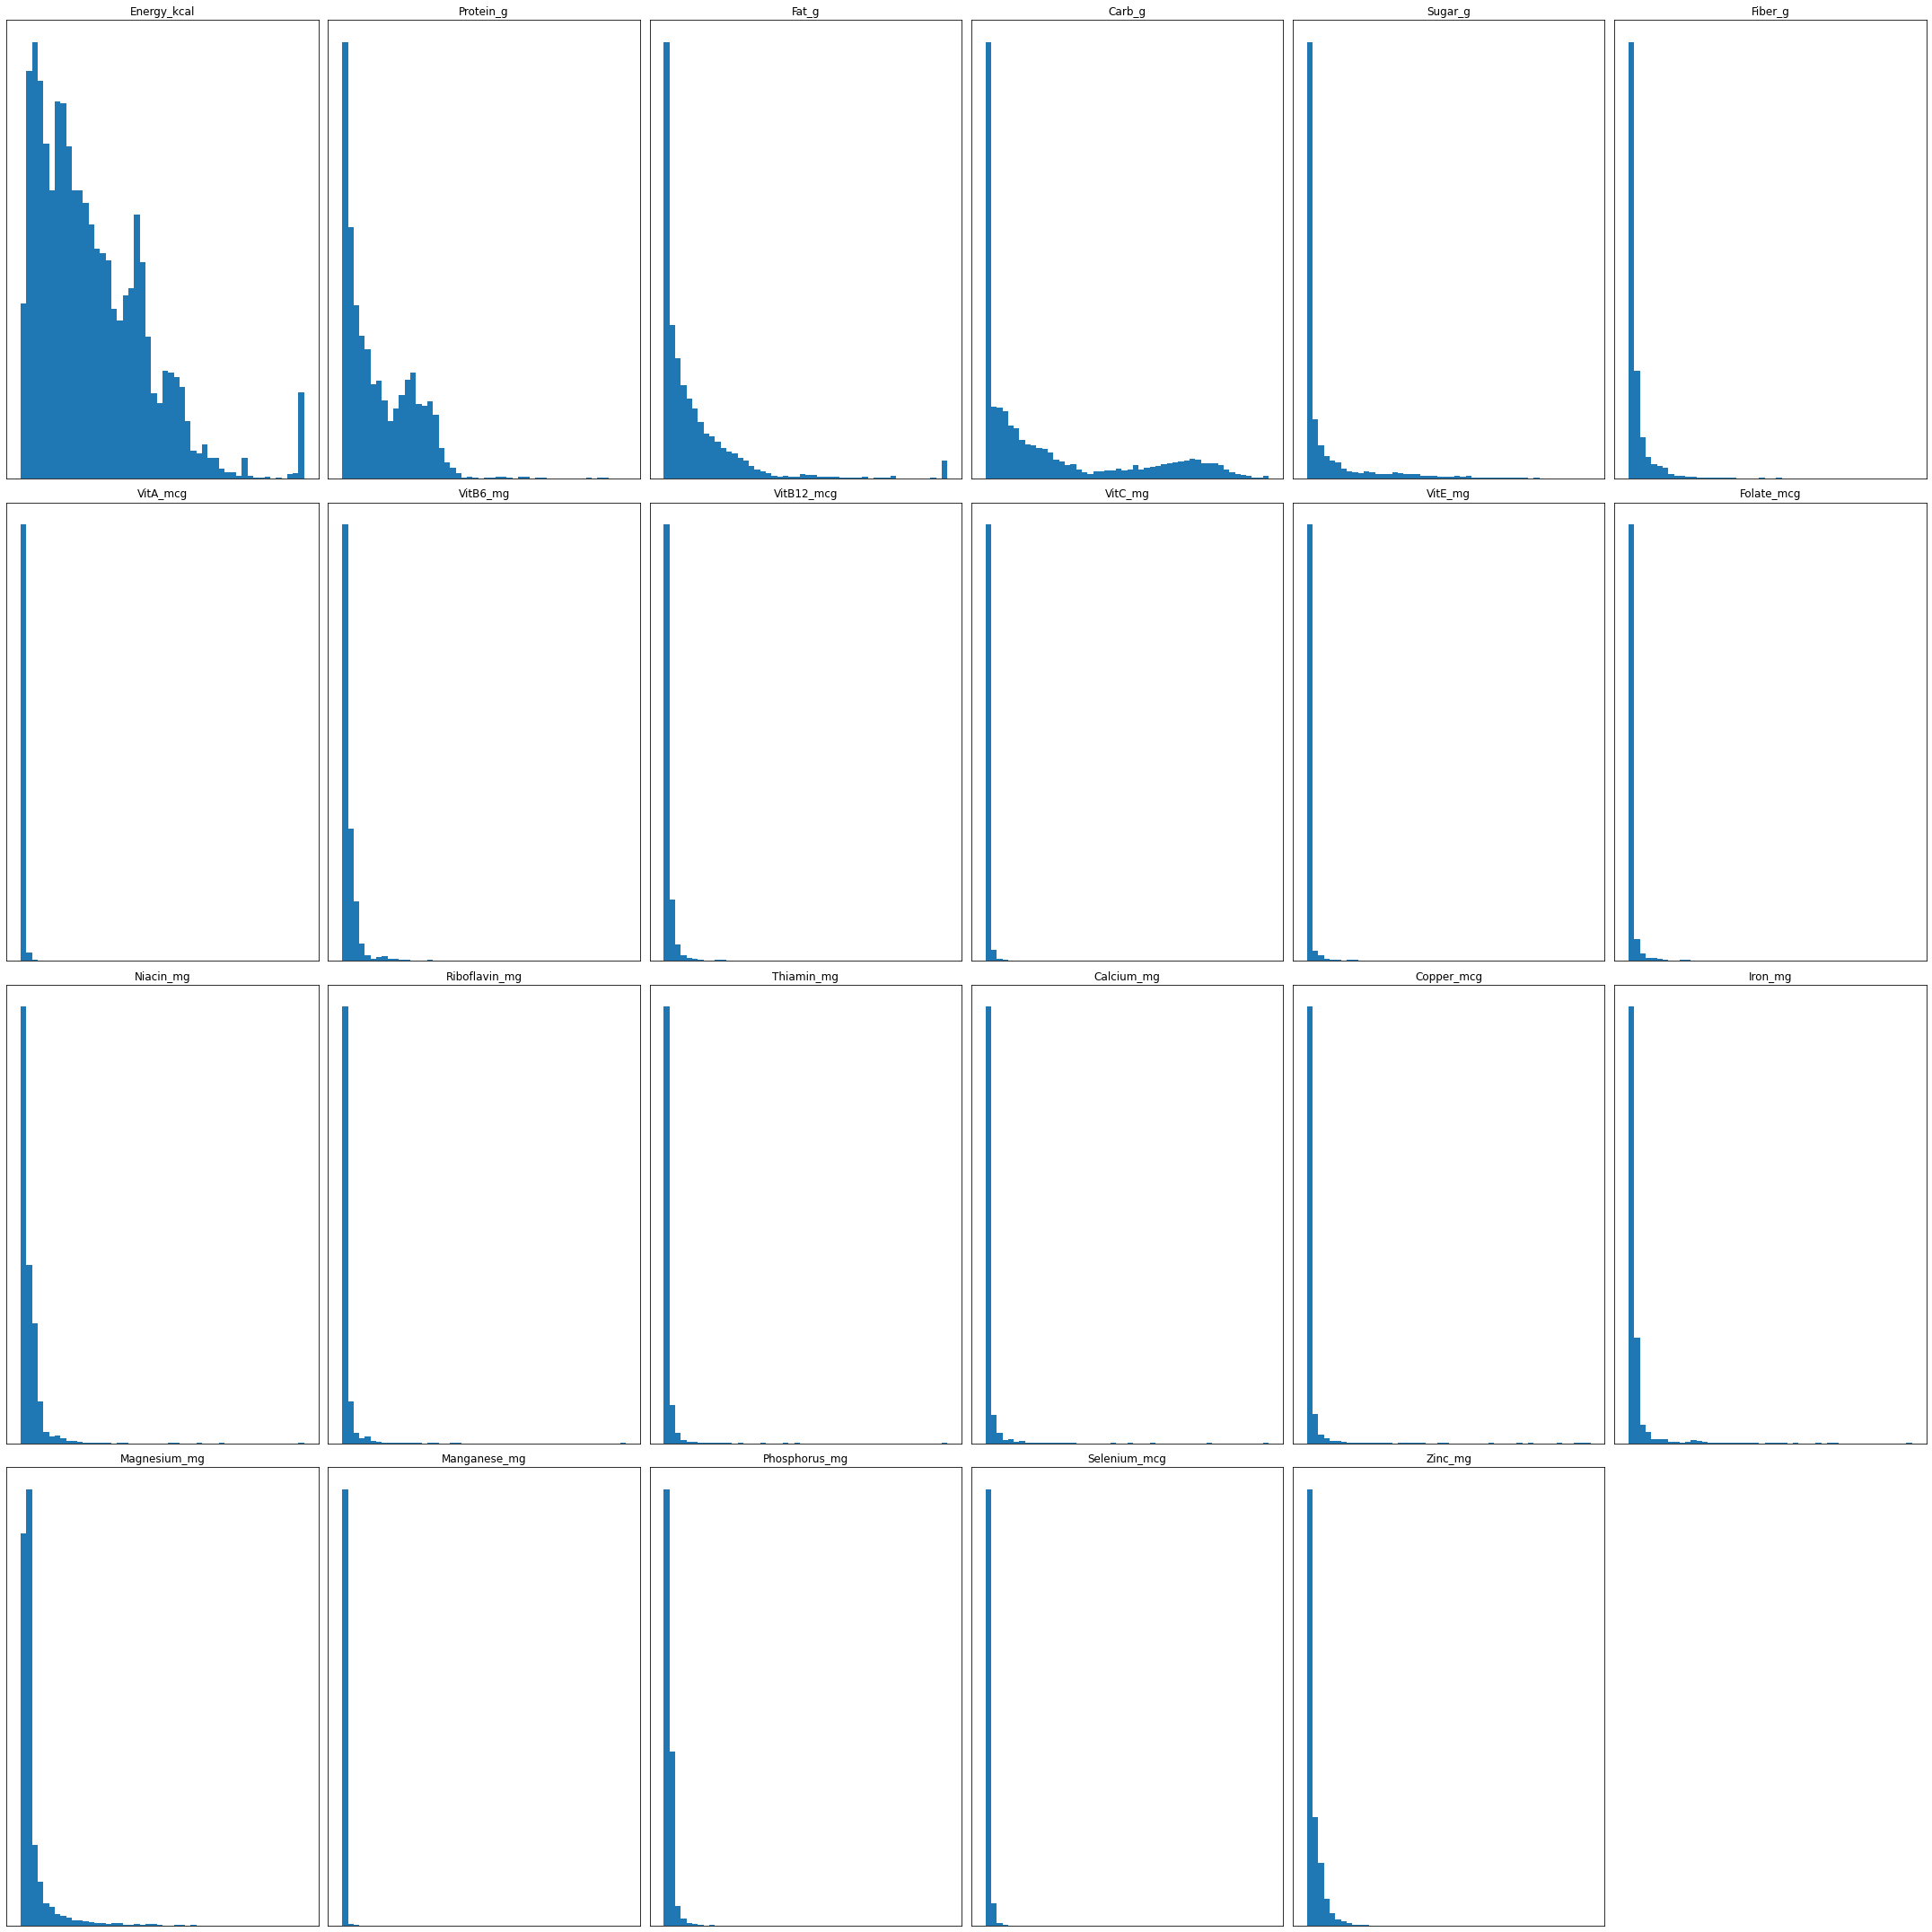

In [8]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(df_help.columns):
    plt.subplot(4, 6, i + 1)
    plt.title(column)
    plt.xticks([])
    plt.yticks([])
    plt.hist(df_help[column], bins=50)
    plt.grid(True) 
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [9]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
df_help = df_help + 1
df_boxcoxed = pd.DataFrame(index=df_help.index)

for i in df_help.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(df_help.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

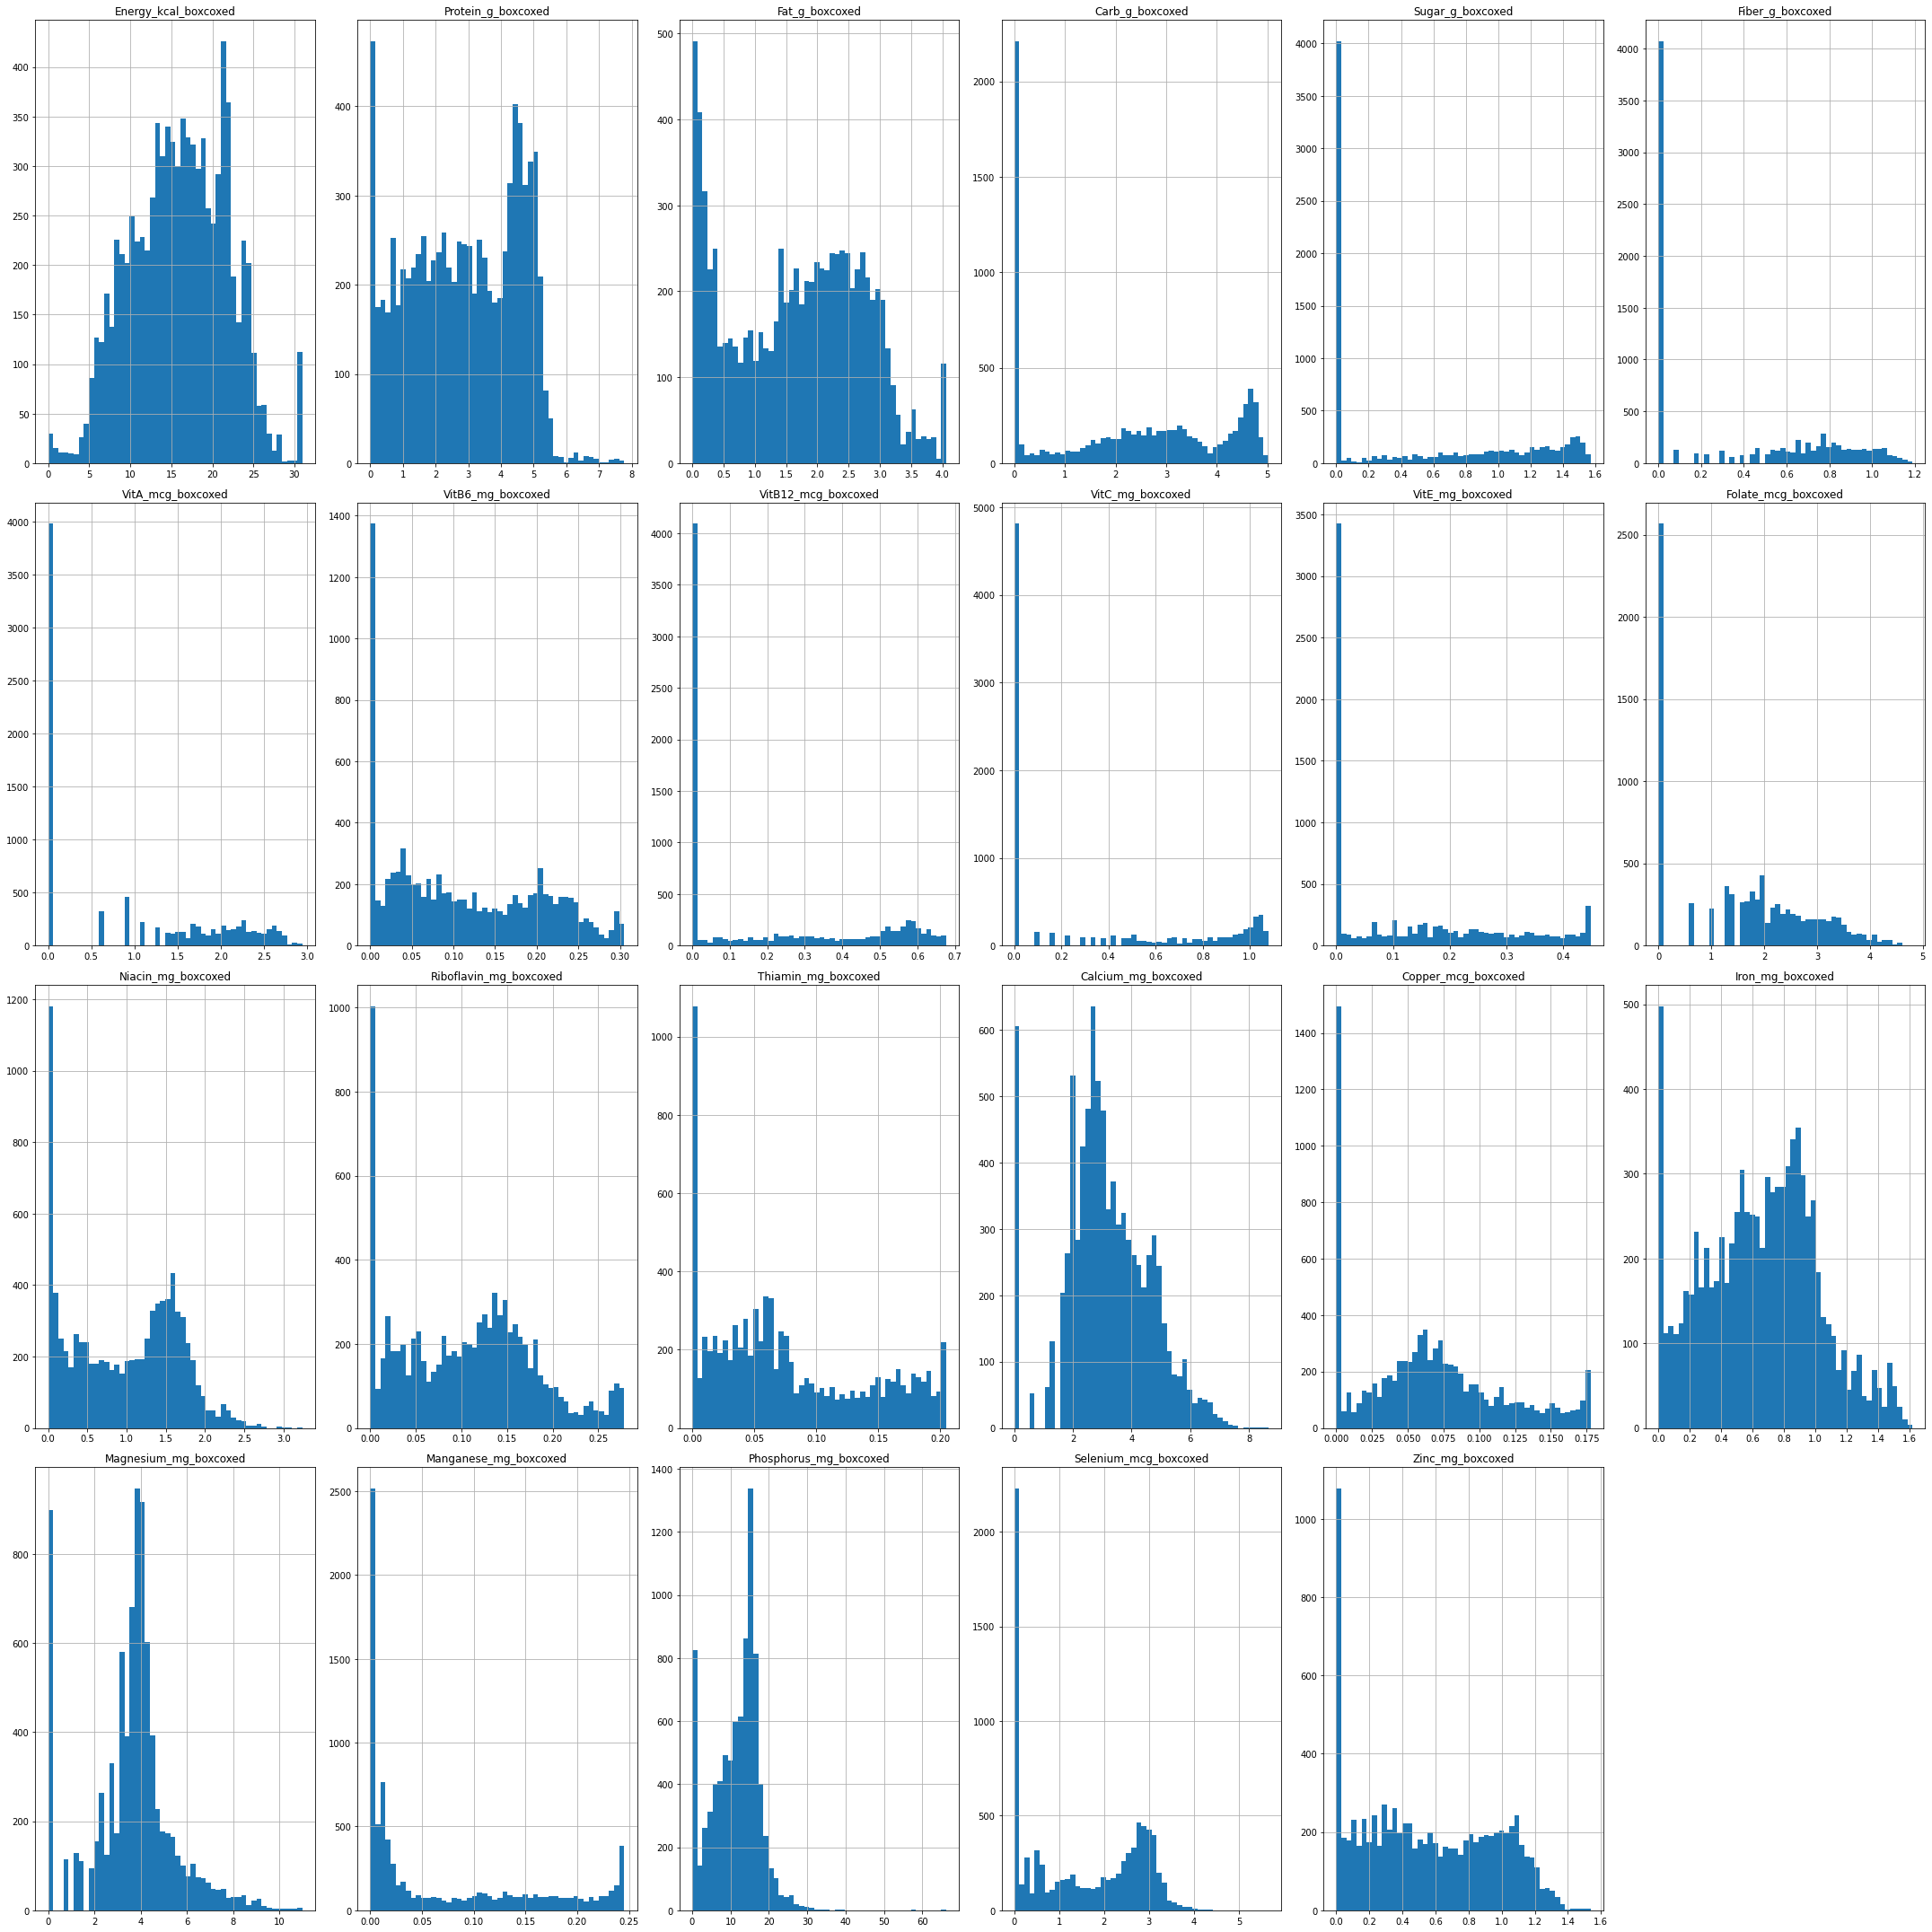

In [10]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(df_boxcoxed.columns):
    plt.subplot(4, 6, i + 1)
    plt.title(column)
    plt.hist(df_boxcoxed[column], bins=50)
    plt.grid(True)  
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [11]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_boxcoxed)
standardized_df = pd.DataFrame(standardized_data, columns=df_boxcoxed.columns)

print("total mean: ", round(standardized_df.values.mean()))
print("total total standard dev: ", round(standardized_df.values.std()))

total mean:  0
total total standard dev:  1


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [12]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        idx = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[idx]
        sorted_eigenvectors = eigenvectors[:, idx]
        self.components = sorted_eigenvectors[:, :self.n_components]
        total_variance = np.sum(sorted_eigenvalues)
        explained_variance = sorted_eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance
    
    def transform(self, X):
        # return the pca result
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
    
    def get_components(self):
        #return pca components (eigenvectors)
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [13]:
n_components = standardized_df.shape[1]
pca = CustomPCA(n_components=n_components)
pca.fit(standardized_data)
pca_result = pca.transform(standardized_data)
explained_variance_ratio = pca.get_explained_variance_ratio()

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


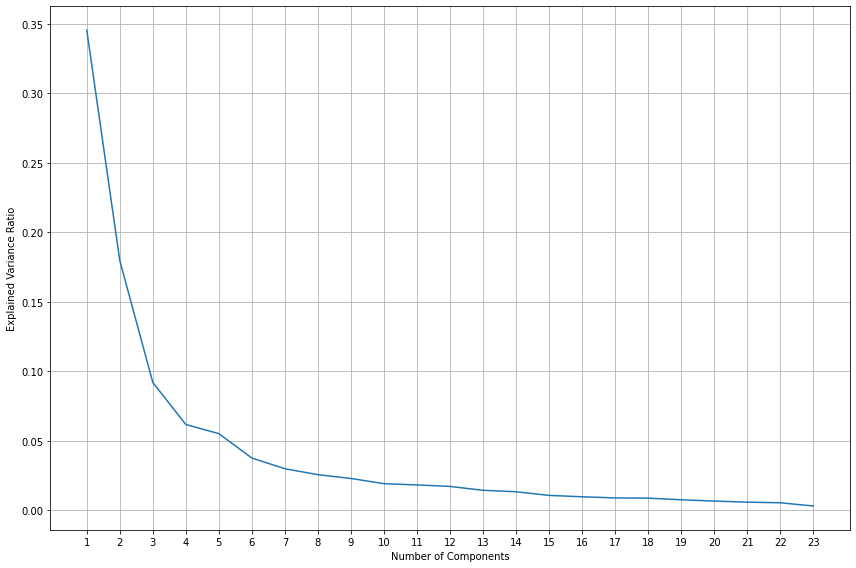

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_components + 1), explained_variance_ratio, linestyle='-', marker=None)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, n_components + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

therefore we are going to pick 5 components

In [15]:
#print the total explained variance ration for the first 5 components
print(np.sum(explained_variance_ratio[:5]))

0.7342383069254742


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [16]:
pca_components = pca_result[:, :5]
food_group = df['FoodGroup']
component_columns = ['c1', 'c2', 'c3', 'c4', 'c5']
pca_df = pd.DataFrame(data=pca_components, columns=component_columns)
pca_df['FoodGroup'] = food_group.values
pca_df.head()

,c1,c2,c3,c4,c5,FoodGroup
0,-2.638414,-1.702512,1.283725,3.759546,2.413650,Dairy and Egg Products
1,-2.537931,-1.550464,1.279816,3.634065,2.492683,Dairy and Egg Products
2,-3.751335,-2.080190,2.067932,3.668154,2.457203,Dairy and Egg Products
3,2.000578,-1.361858,-0.395834,2.432792,0.887796,Dairy and Egg Products
4,1.582713,-1.321484,-0.238444,2.597599,1.286317,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

     c1   c2   c3   c4   c5
c1  1.0 -0.0  0.0  0.0 -0.0
c2 -0.0  1.0 -0.0  0.0  0.0
c3  0.0 -0.0  1.0 -0.0 -0.0
c4  0.0  0.0 -0.0  1.0  0.0
c5 -0.0  0.0 -0.0  0.0  1.0


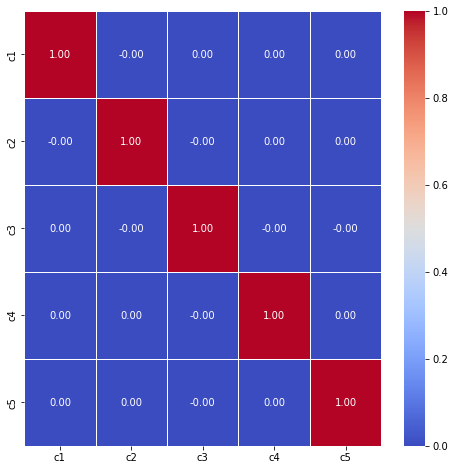

In [17]:
corr = np.corrcoef(pca_components, rowvar=False)
corr_rounded = np.round(corr, decimals=1)
corr_df = pd.DataFrame(corr_rounded, columns=component_columns, index=component_columns)
print(corr_df)

corr = pca_df[component_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [18]:
# TODO get eigenvectors
eigenvectors = pca.get_components()
eigenvectors.shape

(23, 23)

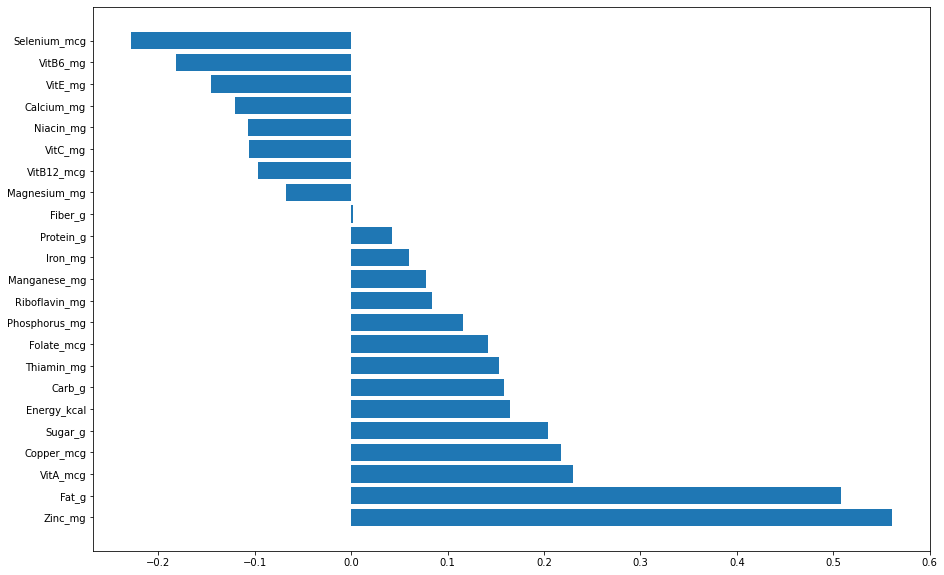

In [19]:
plt.figure(figsize=(15, 10))

idx = np.argsort(-1 * eigenvectors[0])
features = df_numeric.columns[idx]
plt.barh(range(len(idx)), eigenvectors[0, idx])
plt.yticks(range(len(idx)), features)
plt.show()

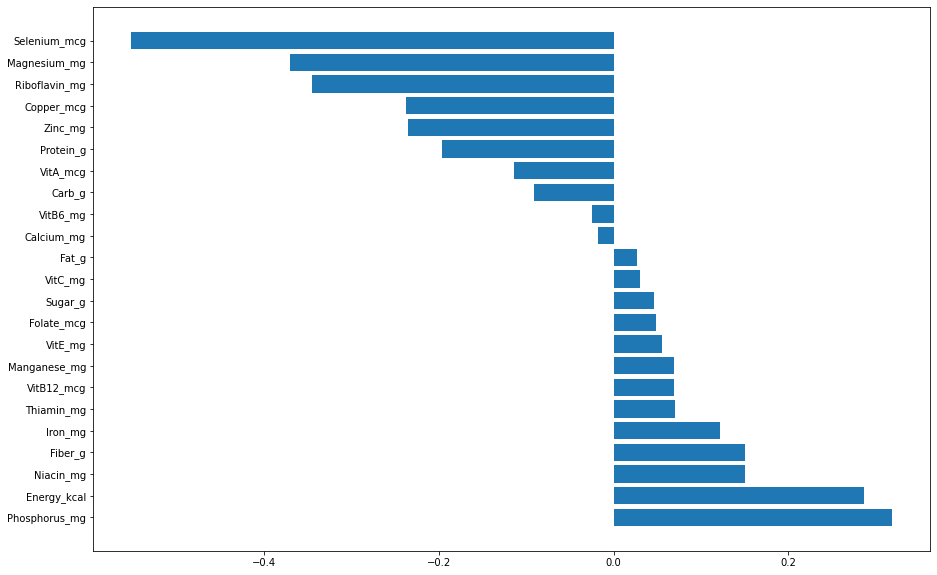

In [20]:
plt.figure(figsize=(15, 10))

idx = np.argsort(-1 * eigenvectors[1])
features = df_numeric.columns[idx]
plt.barh(range(len(idx)), eigenvectors[1, idx])
plt.yticks(range(len(idx)), features)
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">
    Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of data while preserving as much variance as possible. The first principal component (PC1) captures the most variance, leading to a lower reconstruction error compared to the second principal component (PC2). Features with larger absolute values in the component plot contribute more significantly to that principal component. Positive values indicate a positive correlation with the component, while negative values indicate a negative correlation. For instance, in a nutritional dataset, vitamins and minerals with high positive values in PC1 and PC2 contribute strongly to those components. Specifically, vitamin A and selenium significantly increase PC1, while zinc decreases it. In PC2, selenium increases the component the most, while magnesium decreases it. Features with values near zero have minimal impact on the principal components. Each component is orthogonal, ensuring that the captured variance does not overlap, thus efficiently summarizing the most critical patterns in high-dimensional data.<br><br>
    If a nutrient has a high positive value in a component vector, it means this nutrient contributes strongly and positively to that principal component.
    <br>
    If a nutrient has a high negative value in a component vector, it means this nutrient contributes strongly and negatively to that principal component.
</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

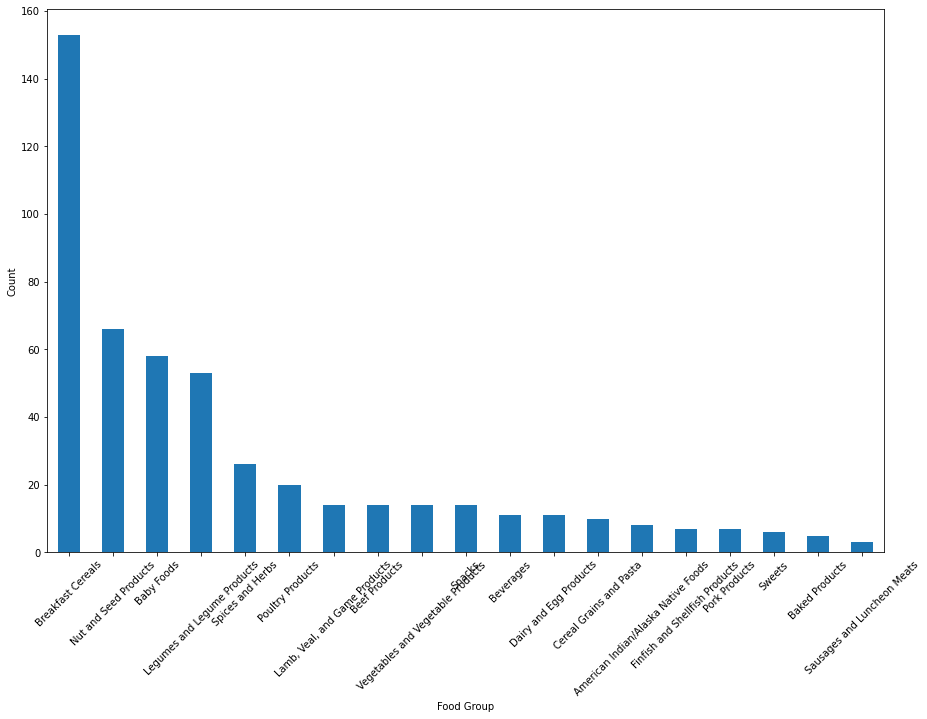

In [21]:
top_500 = pca_df.nlargest(500, 'c1')
plt.figure(figsize=(15, 10))
top_500['FoodGroup'].value_counts().plot(kind='bar', rot=45)
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.show()

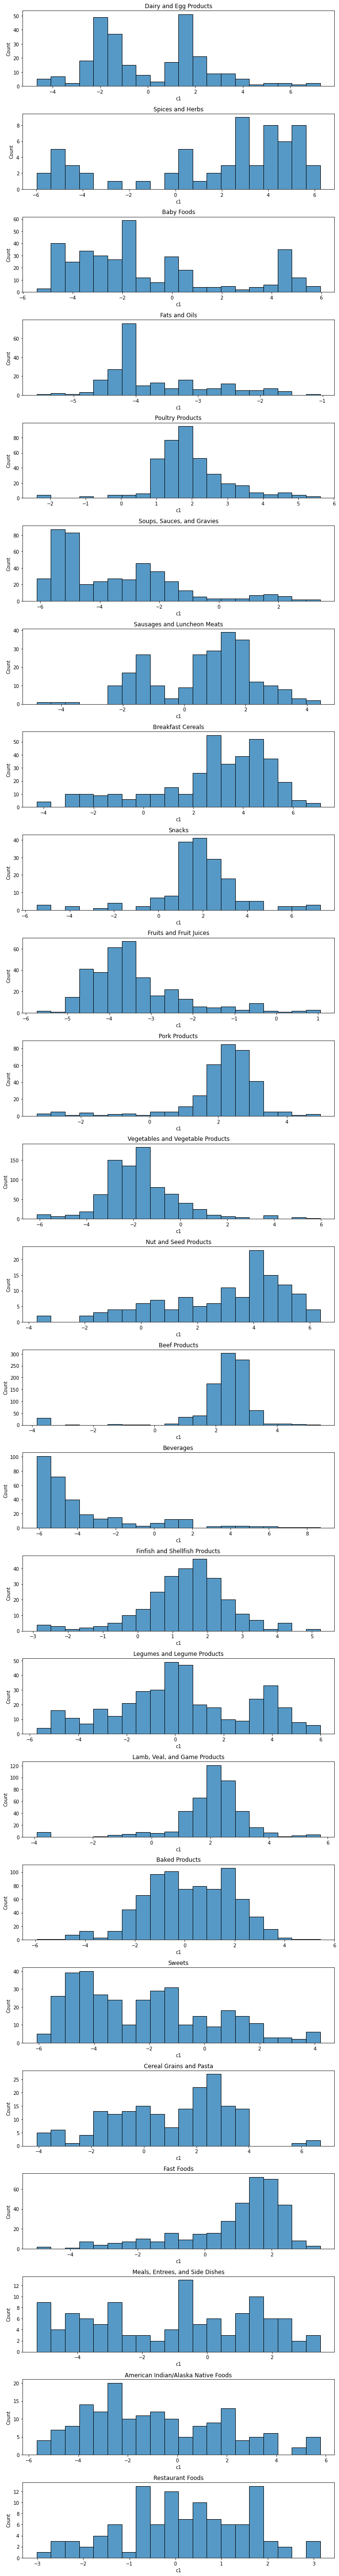

In [22]:
groups = pca_df['FoodGroup'].unique()
food_groups = len(groups)
plt.figure(figsize=(10, food_groups*3))

for i, food_group in enumerate(groups, 1):
    plt.subplot(food_groups, 1, i)
    sns.histplot(pca_df[pca_df['FoodGroup'] == food_group]['c1'], bins=20)
    plt.title(f'{food_group}')
    plt.xlabel('c1')

plt.tight_layout()
plt.show()

Do the same for pca2.

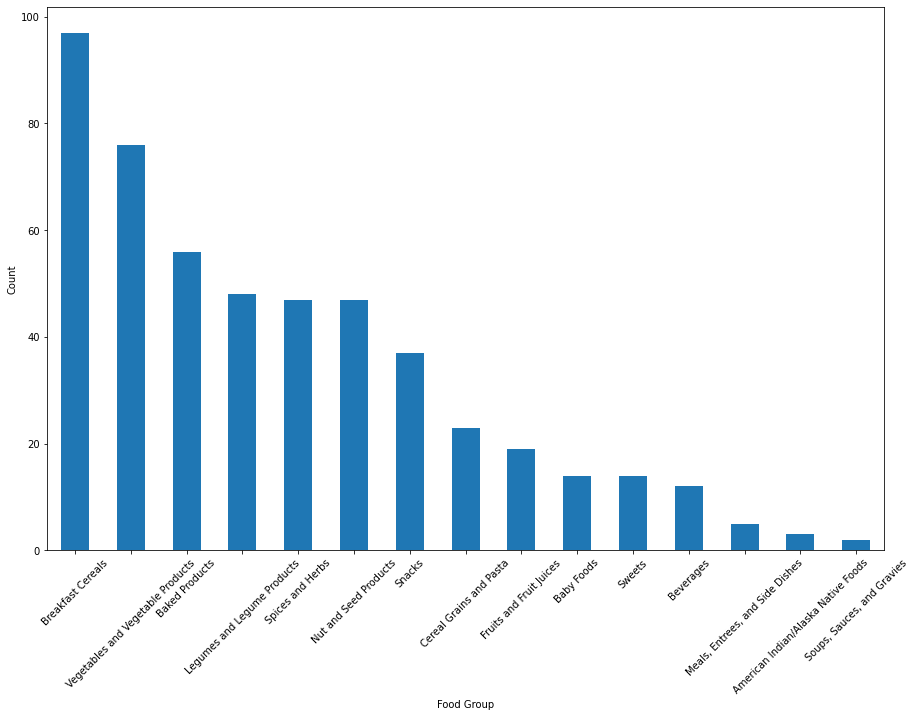

In [23]:
plt.figure(figsize=(15, 10))

top_500 = pca_df.nlargest(500, 'c2')
top_500['FoodGroup'].value_counts().plot(kind='bar', rot=45)
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.show()

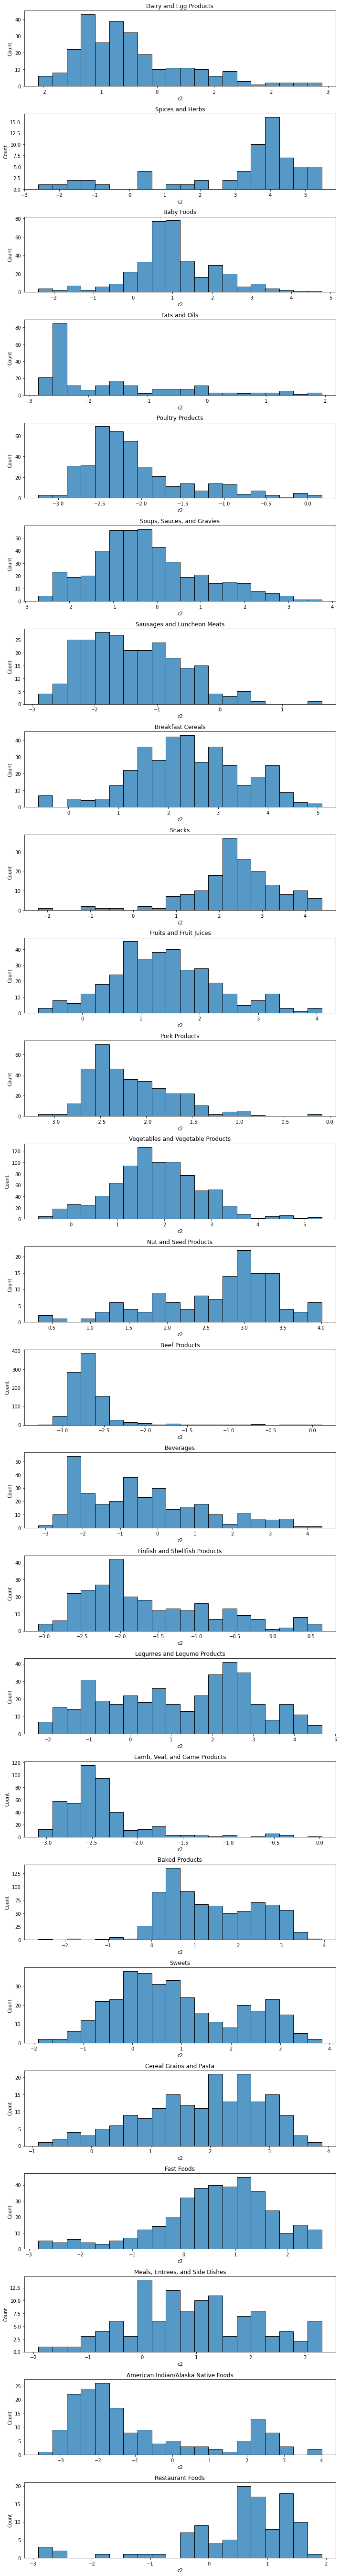

In [24]:
groups = pca_df['FoodGroup'].unique()
food_groups = len(groups)
plt.figure(figsize=(10, food_groups*3))

for i, food_group in enumerate(groups, 1):
    plt.subplot(food_groups, 1, i)
    sns.histplot(pca_df[pca_df['FoodGroup'] == food_group]['c2'], bins=20)
    plt.title(f'{food_group}')
    plt.xlabel('c2')

plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


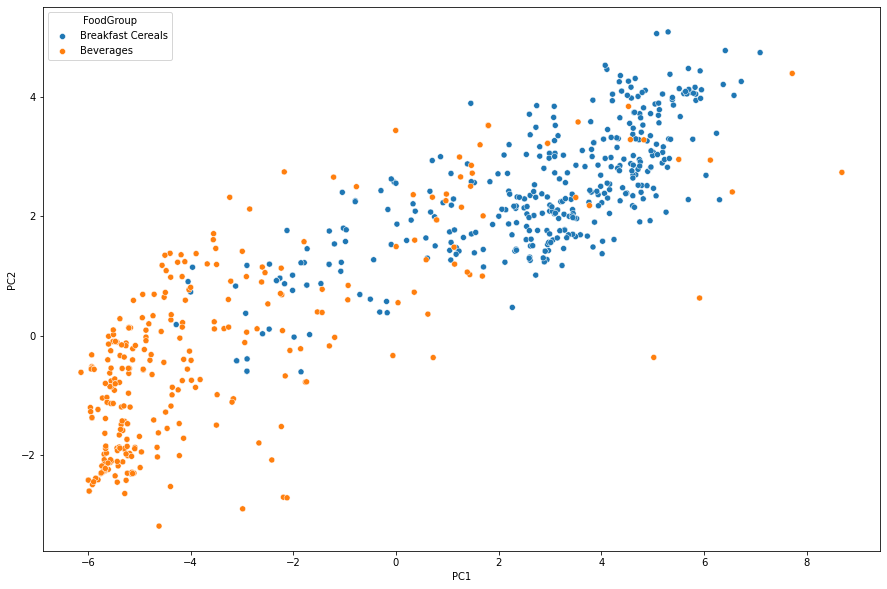

In [25]:
plt.figure(figsize=(15, 10))

beverages_Breakfast_df = pca_df[pca_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]
sns.scatterplot(data=beverages_Breakfast_df, x='c1', y='c2', hue='FoodGroup')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">
    We can determine the distribution of each food group concerning a principal component. This enables us to understand the relationship between the PCA and specific food groups, facilitating better classification of these groups afterward. Typically, after performing PCA, we classify the data to learn about their differences.
    <br>
    We can learn that they have overllaping and each data like GMM have a probabilty of being in each of them.
</span>

```
PCA1 Distribution by Food Group:
Beverages: Beverages show a broader distribution of PCA1 values, indicating variability in nutrient composition across different types of beverages.
Breakfast Cereals: Breakfast cereals tend to cluster around lower PCA1 values, suggesting they have a more consistent nutrient profile compared to beverages.

Food Group Contributions to PCA Components:
Beverages: Certain beverages may contribute more significantly to PCA1 values, possibly due to higher concentrations of specific nutrients or ingredients.
Breakfast Cereals: The distribution of PCA1 values for breakfast cereals suggests a narrower range, indicating less variability in nutrient composition compared to beverages.
```



### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">
    First, we can observe the distribution of PC1 in the scatter plot, with PC1 represented on the horizontal axis. For instance, the scatter plot shows a high concentration of beverage data points below -4 on PC1, which is also reflected in their distribution patterns. Additionally, we can see four plots (two food types across both PC1 and PC2) within a single scatter plot. By analyzing PC2, we can conclude that a lower PC1 value also correlates with a lower PC2 value for beverages, and the same relationship holds true for breakfast cereals.
</span>

```
This plot reveals the relative positioning of Beverages and Breakfast Cereals in a two-dimensional space derived from PCA. It shows how these food groups cluster or spread out based on their principal components, which are linear combinations of the original nutrient features.
The distribution of PCA1 values validates the relative positions seen in the PCA1 vs PCA2 plot. For instance, if Beverages are spread widely in the PCA1 vs PCA2 plot, their distribution of PCA1 values would likely be broader, reflecting higher variability in nutrient composition.
Together, they provide insights into how different food groups vary in their nutrient profiles. Beverages, as shown in both plots, demonstrate greater diversity in nutrient composition, whereas Breakfast Cereals exhibit a more consistent profile.
```
